In [1]:
from preprocess import preProcess as pp
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

In [2]:
#obtain cities 
%time cities=pp.obtainCityDf("Indonesia")

CPU times: user 780 ms, sys: 90.5 ms, total: 871 ms
Wall time: 1.18 s


In [3]:
cities_df, popDict, areaDict, aUCDict, aComDict=cities

In [4]:
dict(list(popDict.items())[0:5])

{4768.0: 56036.54037094116,
 6773.0: 56090.59964752197,
 6818.0: 56395.4094543457,
 3498.0: 58665.77061462402,
 7047.0: 63455.735834121704}

In [5]:
cities_df.sample(3)

,eFUA_ID,UC_num,UC_IDs,eFUA_name,Commuting,Cntry_ISO,Cntry_name,FUA_area,UC_area,FUA_p_2015,UC_p_2015,Com_p_2015,geometry,Comm_area
eFUA_ID,,,,,,,,,,,,,,
3204.0,3204.0,1.0,11145,Semurup,1.0,IDN,Indonesia,63.0,21.0,117141.546623,56224.422516,60917.124107,"MULTIPOLYGON (((101.36078 -1.95736, 101.37076 ...",42.0
4262.0,4262.0,1.0,11585,Prabumulih,1.0,IDN,Indonesia,79.0,25.0,144041.131489,119078.046631,24963.084858,"MULTIPOLYGON (((104.30996 -3.38140, 104.29997 ...",54.0
7138.0,7138.0,1.0,13028,Ternate,1.0,IDN,Indonesia,64.0,28.0,190406.817505,183062.143173,7344.674332,"MULTIPOLYGON (((127.39331 0.76834, 127.38333 0...",36.0


<AxesSubplot:>

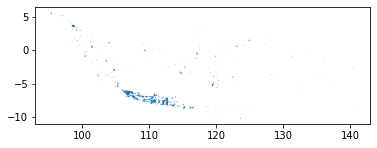

In [6]:
#cities_df is gdf
%matplotlib inline
cities_df.plot()

In [7]:
%time gdps=pp.obtainGDP("Indonesia")
#takes time

CPU times: user 39.2 s, sys: 25.5 s, total: 1min 4s
Wall time: 1min 37s


In [8]:
#there 2 returns
gdpDict,totGdpDict=gdps

In [9]:
dict(list(gdpDict.items())[0:2])

{4768.0:     raster_val                                           geometry
 0     265088.0  POLYGON ((105.74167 -6.51667, 105.74167 -6.525...
 1    4526032.0  POLYGON ((105.75000 -6.51667, 105.75000 -6.525...
 2    5542267.0  POLYGON ((105.75833 -6.51667, 105.75833 -6.525...
 3    3550938.0  POLYGON ((105.72500 -6.52500, 105.72500 -6.533...
 4   23250332.0  POLYGON ((105.73333 -6.52500, 105.73333 -6.533...
 5    6804464.0  POLYGON ((105.74167 -6.52500, 105.74167 -6.533...
 6    4501591.0  POLYGON ((105.75000 -6.52500, 105.75000 -6.533...
 7   13035710.0  POLYGON ((105.76667 -6.52500, 105.76667 -6.533...
 8   25108274.0  POLYGON ((105.73333 -6.53333, 105.73333 -6.541...
 9   15652170.0  POLYGON ((105.74167 -6.53333, 105.74167 -6.541...
 10  23503032.0  POLYGON ((105.75833 -6.53333, 105.75833 -6.541...
 11  49055284.0  POLYGON ((105.73333 -6.54167, 105.73333 -6.550...
 12   9044970.0  POLYGON ((105.74167 -6.54167, 105.74167 -6.550...
 13  11103312.0  POLYGON ((105.73333 -6.55000, 105.733

In [10]:
dict(list(totGdpDict.items())[0:4])

{4768.0: 195602055.0,
 6773.0: 42062448.0,
 6818.0: 972283610.0,
 3498.0: 1397346540.0}

Text(0.5, 1.0, 'Mataram')

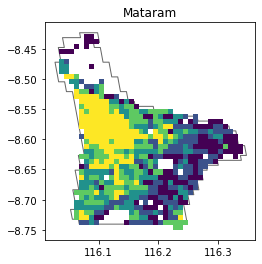

In [11]:
#let's take a look at gdp within a city
city_id= cities_df.sample(1).index[-1] #random city id
%matplotlib inline
ax=gpd.GeoSeries(cities_df.loc[city_id]["geometry"]).plot(color="w", edgecolor="k", alpha=0.6)
gdpDict[city_id].plot("raster_val",  scheme='quantiles', ax=ax)
plt.title(cities_df.loc[city_id]["eFUA_name"])

In [12]:
#get country's boundary from gdam for plotting  (takes time) 
%time country_all=pp.obtainCountryBoundary("IDN", "ADM_0")

getting ADM_0 file....
CPU times: user 2.62 s, sys: 2.95 s, total: 5.57 s
Wall time: 4min 32s


<AxesSubplot:>

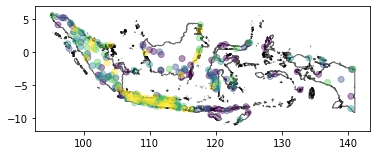

In [13]:
#let's make a big map
%matplotlib inline
ax=country_all.plot(color="w", edgecolor="k", alpha=0.6)
for k, v in totGdpDict.items():
    cities_df.at[k,"gdp_tot"]=v
cities_df["geometry"]=cities_df.centroid
cities_df.plot("gdp_tot",scheme="quantiles",alpha=0.4,ax=ax)

In [14]:
#Done